In [84]:
import os
import ultralytics
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn.model_selection
from PIL import Image



In [1]:
from ultralytics import YOLO
from roboflow import Roboflow

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

from roboflow import Roboflow
rf = Roboflow(api_key="gUKzjS0bKmbUB7zElR1i")
project = rf.workspace("recycle").project("recyclable-items")
version = project.version(3)
dataset = version.download("yolov8")

# Train the model
results = model.train(data='coco128.yaml', epochs=100, imgsz=640)

Transferred 355/355 items from pretrained weights
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.44, to fix: `pip install ultralytics==8.0.196`
New https://pypi.org/project/ultralytics/8.2.5 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.44  Python-3.12.0 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10239MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=coco128.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, 

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.


AMP: checks passed 


train: Scanning C:\Users\curvh\OneDrive\Рабочий стол\python\datasets\coco128\labels\train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
val: Scanning C:\Users\curvh\OneDrive\Рабочий стол\python\datasets\coco128\labels\train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.63G      1.214      1.669       1.27        217        640: 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        128        929       0.65      0.526      0.614      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.45G        1.2      1.434      1.229        218        640: 100%|██████████| 8/8 [00:01<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]


                   all        128        929      0.663      0.535      0.628      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.68G      1.155      1.372       1.25        215        640: 100%|██████████| 8/8 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]


                   all        128        929      0.694       0.54      0.638      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.58G      1.133      1.357      1.193        148        640: 100%|██████████| 8/8 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        128        929      0.724      0.565      0.654      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.5G      1.116       1.25      1.196        240        640: 100%|██████████| 8/8 [00:00<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]

                   all        128        929      0.755       0.59       0.67      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.61G      1.171      1.357      1.211        187        640: 100%|██████████| 8/8 [00:00<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]


                   all        128        929      0.738      0.616      0.687      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.58G      1.132      1.215      1.196        164        640: 100%|██████████| 8/8 [00:00<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]


                   all        128        929      0.757      0.608      0.688       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.47G      1.099      1.186      1.188        269        640: 100%|██████████| 8/8 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        128        929      0.736       0.63      0.697      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.46G        1.1      1.235      1.191        166        640: 100%|██████████| 8/8 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        128        929      0.737      0.642      0.712      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.47G      1.088      1.168      1.189        187        640: 100%|██████████| 8/8 [00:00<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        128        929      0.765      0.649      0.725      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.47G      1.092      1.135      1.174        194        640: 100%|██████████| 8/8 [00:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        128        929      0.778      0.642       0.75      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.59G        1.1      1.088      1.162        202        640: 100%|██████████| 8/8 [00:00<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]


                   all        128        929      0.791      0.665      0.766      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.59G      1.083      1.095      1.173        276        640: 100%|██████████| 8/8 [00:00<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]


                   all        128        929      0.817      0.667       0.78      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.57G      1.081      1.116      1.181        213        640: 100%|██████████| 8/8 [00:00<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        128        929      0.806      0.677      0.781      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.47G      1.038      1.031      1.145        266        640: 100%|██████████| 8/8 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]


                   all        128        929      0.789      0.692      0.786      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.63G      1.035      1.072      1.146        148        640: 100%|██████████| 8/8 [00:00<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]


                   all        128        929      0.714       0.76      0.796       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.73G     0.9914     0.9819      1.119        212        640: 100%|██████████| 8/8 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.94it/s]

                   all        128        929      0.758       0.74      0.809      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.48G      1.063      1.042      1.178        131        640: 100%|██████████| 8/8 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]


                   all        128        929      0.756      0.773      0.815      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.59G      1.008     0.9588      1.126        162        640: 100%|██████████| 8/8 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]


                   all        128        929       0.83      0.709      0.815      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.48G     0.9796     0.9378      1.111        236        640: 100%|██████████| 8/8 [00:00<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        128        929      0.821      0.734      0.821      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.58G     0.9746     0.9316       1.13        188        640: 100%|██████████| 8/8 [00:00<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        128        929      0.826      0.736      0.822      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.58G      1.019     0.9476      1.146        189        640: 100%|██████████| 8/8 [00:00<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]


                   all        128        929      0.825      0.742      0.817      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.59G      1.026     0.9898      1.149        221        640: 100%|██████████| 8/8 [00:00<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]


                   all        128        929      0.795      0.778      0.819      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.59G     0.9302      0.875        1.1        211        640: 100%|██████████| 8/8 [00:00<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]


                   all        128        929      0.821      0.767      0.821      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.62G      1.022     0.9749      1.139        311        640: 100%|██████████| 8/8 [00:00<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        128        929      0.813      0.774      0.825      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.62G      1.019     0.9415       1.13        172        640: 100%|██████████| 8/8 [00:00<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]


                   all        128        929      0.788      0.785      0.832       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.58G      0.962     0.8546       1.11        212        640: 100%|██████████| 8/8 [00:00<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        128        929      0.793      0.777      0.837      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.58G     0.9483     0.8976      1.108        236        640: 100%|██████████| 8/8 [00:00<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]


                   all        128        929      0.856      0.746      0.838      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.46G      0.962     0.8715      1.089        206        640: 100%|██████████| 8/8 [00:00<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]


                   all        128        929      0.888      0.732      0.842       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.59G     0.9279     0.8465      1.085        208        640: 100%|██████████| 8/8 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        128        929      0.797        0.8      0.845      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.42G     0.9592     0.8969      1.092        160        640: 100%|██████████| 8/8 [00:00<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        128        929      0.813      0.793       0.85      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.47G     0.9776     0.8503      1.081        219        640: 100%|██████████| 8/8 [00:00<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]


                   all        128        929      0.839      0.786      0.854      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.6G     0.8734     0.8024      1.071        153        640: 100%|██████████| 8/8 [00:00<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]


                   all        128        929      0.848      0.782      0.852      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.59G      0.944     0.8358       1.08        135        640: 100%|██████████| 8/8 [00:00<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        128        929      0.862       0.78      0.857      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.73G     0.9002     0.8125      1.071        153        640: 100%|██████████| 8/8 [00:00<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]


                   all        128        929      0.866      0.778      0.856       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.48G     0.9118     0.8579      1.095        173        640: 100%|██████████| 8/8 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]


                   all        128        929      0.867      0.778      0.855       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.48G     0.8996     0.7933      1.052        234        640: 100%|██████████| 8/8 [00:00<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        128        929      0.862      0.782      0.855      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.69G     0.9244     0.7858      1.068        290        640: 100%|██████████| 8/8 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]


                   all        128        929      0.872      0.786      0.856      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.57G     0.9271     0.8028      1.084        230        640: 100%|██████████| 8/8 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]


                   all        128        929      0.879      0.795      0.858      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.48G     0.9409      0.814      1.073        223        640: 100%|██████████| 8/8 [00:00<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        128        929      0.879      0.795      0.856      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.65G     0.9249      0.806      1.087        204        640: 100%|██████████| 8/8 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]


                   all        128        929      0.882      0.793       0.86      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.46G     0.8957     0.7927      1.088        159        640: 100%|██████████| 8/8 [00:00<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]


                   all        128        929      0.875        0.8       0.86      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.46G     0.9081     0.8063      1.078        259        640: 100%|██████████| 8/8 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]


                   all        128        929      0.877      0.793       0.86      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.73G     0.8962     0.8022      1.048        354        640: 100%|██████████| 8/8 [00:00<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]


                   all        128        929      0.895      0.776      0.858      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.46G       0.93     0.8301      1.074        273        640: 100%|██████████| 8/8 [00:00<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]


                   all        128        929      0.891      0.784      0.862      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.48G     0.8719     0.7929      1.063        208        640: 100%|██████████| 8/8 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]


                   all        128        929      0.897      0.782      0.864      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.65G     0.9163     0.7876      1.075        268        640: 100%|██████████| 8/8 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]


                   all        128        929      0.903      0.781      0.864      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.46G     0.8633     0.7468      1.045        184        640: 100%|██████████| 8/8 [00:00<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]


                   all        128        929       0.91      0.788      0.867      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.62G     0.8759     0.7594      1.059        190        640: 100%|██████████| 8/8 [00:00<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        128        929      0.897      0.799      0.869       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.58G     0.9035     0.7628      1.056        286        640: 100%|██████████| 8/8 [00:00<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]


                   all        128        929      0.878      0.809      0.872      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.52G     0.8629     0.7498      1.028        222        640: 100%|██████████| 8/8 [00:00<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]


                   all        128        929      0.895      0.802      0.874      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.49G     0.8849     0.7632      1.059        177        640: 100%|██████████| 8/8 [00:00<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all        128        929      0.891      0.799      0.872      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.47G     0.8523     0.7414      1.047        285        640: 100%|██████████| 8/8 [00:00<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]


                   all        128        929      0.896      0.804      0.875      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.6G     0.8659     0.7319      1.051        263        640: 100%|██████████| 8/8 [00:00<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]

                   all        128        929      0.907      0.802      0.875      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.61G     0.8595     0.7347      1.048        136        640: 100%|██████████| 8/8 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all        128        929      0.906      0.798      0.876      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.59G     0.8973     0.7743       1.06        243        640: 100%|██████████| 8/8 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]


                   all        128        929      0.915      0.794       0.88      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.59G     0.9114     0.7891      1.049        186        640: 100%|██████████| 8/8 [00:00<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        128        929       0.92      0.791      0.881      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.51G     0.9084     0.7497      1.044        220        640: 100%|██████████| 8/8 [00:00<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]


                   all        128        929      0.919      0.789      0.881      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.46G     0.8679     0.7522       1.03        148        640: 100%|██████████| 8/8 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        128        929      0.921      0.791      0.883      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.47G     0.8791     0.7516      1.043        254        640: 100%|██████████| 8/8 [00:00<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]


                   all        128        929      0.917       0.79      0.884      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.51G     0.8858     0.7506      1.059        238        640: 100%|██████████| 8/8 [00:00<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]


                   all        128        929      0.899      0.802      0.884      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.48G     0.8077     0.7087       1.02        239        640: 100%|██████████| 8/8 [00:00<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        128        929      0.901      0.803       0.88      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.49G     0.9222     0.7637      1.054        176        640: 100%|██████████| 8/8 [00:00<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]


                   all        128        929      0.902      0.806       0.88      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.48G     0.8551     0.7447      1.046        258        640: 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]


                   all        128        929      0.903      0.804       0.88      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.46G     0.8773      0.711      1.046        228        640: 100%|██████████| 8/8 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all        128        929      0.907      0.796      0.879       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.58G     0.8279     0.7028      1.033        142        640: 100%|██████████| 8/8 [00:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.51it/s]


                   all        128        929      0.909        0.8      0.879       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.73G     0.8647     0.7142      1.043        285        640: 100%|██████████| 8/8 [00:00<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]


                   all        128        929      0.906      0.806      0.882       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.48G     0.8105      0.693      1.027        214        640: 100%|██████████| 8/8 [00:00<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        128        929      0.914      0.803      0.882      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.51G     0.8202      0.697      1.029        193        640: 100%|██████████| 8/8 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]


                   all        128        929      0.923      0.798      0.882      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.44G     0.8299     0.7351      1.038        222        640: 100%|██████████| 8/8 [00:00<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all        128        929      0.925      0.795      0.881       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.47G     0.8794     0.7375      1.043        260        640: 100%|██████████| 8/8 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]


                   all        128        929      0.925       0.79      0.879       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.46G     0.8498     0.7272       1.05        189        640: 100%|██████████| 8/8 [00:00<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        128        929      0.922      0.791      0.883      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.48G     0.8088     0.6964      1.021        192        640: 100%|██████████| 8/8 [00:00<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        128        929      0.907      0.802      0.884       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.47G     0.8271     0.7081      1.036        178        640: 100%|██████████| 8/8 [00:00<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]


                   all        128        929      0.905      0.804       0.88      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.58G      0.838     0.6975      1.032        234        640: 100%|██████████| 8/8 [00:00<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]


                   all        128        929      0.901      0.809      0.879      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.44G     0.8268     0.6922      1.038        228        640: 100%|██████████| 8/8 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]


                   all        128        929      0.903      0.808      0.881      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.52G     0.8775      0.732      1.033        203        640: 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]


                   all        128        929      0.898      0.811      0.881      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.46G     0.8753     0.7178      1.033        163        640: 100%|██████████| 8/8 [00:00<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]


                   all        128        929      0.922      0.799      0.881      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.47G     0.8723     0.6953       1.04        233        640: 100%|██████████| 8/8 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]


                   all        128        929      0.917      0.804      0.881      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.44G     0.8279     0.6692      1.019        229        640: 100%|██████████| 8/8 [00:00<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]


                   all        128        929      0.919      0.807      0.885      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.59G     0.8304     0.6894      1.036        231        640: 100%|██████████| 8/8 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]


                   all        128        929      0.921      0.809      0.886      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.47G     0.8086     0.6763      1.026        216        640: 100%|██████████| 8/8 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]


                   all        128        929      0.924      0.808      0.886      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.66G     0.8849     0.7194      1.045        193        640: 100%|██████████| 8/8 [00:00<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]


                   all        128        929      0.921      0.808      0.885      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.58G     0.7657      0.642      1.012        240        640: 100%|██████████| 8/8 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]


                   all        128        929      0.925      0.809      0.887      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.46G     0.8315     0.6859      1.011        244        640: 100%|██████████| 8/8 [00:00<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]


                   all        128        929      0.921      0.809      0.887      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.48G     0.8281     0.7127      1.019        220        640: 100%|██████████| 8/8 [00:00<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]


                   all        128        929      0.919      0.818      0.894      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.59G     0.7713      0.664      1.029        180        640: 100%|██████████| 8/8 [00:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        128        929      0.919      0.818      0.893      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.59G     0.7666     0.6623      1.022        167        640: 100%|██████████| 8/8 [00:00<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]


                   all        128        929       0.93      0.812      0.891       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.57G     0.8365     0.7208      1.033        149        640: 100%|██████████| 8/8 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all        128        929       0.93      0.811      0.892      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.48G     0.8105     0.6584      1.028        226        640: 100%|██████████| 8/8 [00:00<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        128        929      0.929      0.811      0.892      0.742


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.46G     0.8346     0.7278     0.9994        161        640: 100%|██████████| 8/8 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all        128        929      0.933      0.812       0.89      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.6G     0.8672     0.7614      1.017        132        640: 100%|██████████| 8/8 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]


                   all        128        929      0.907       0.81      0.882      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.5G     0.8609     0.7143       1.02        124        640: 100%|██████████| 8/8 [00:00<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all        128        929      0.901      0.804      0.879      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.59G     0.8435     0.7201      1.007        124        640: 100%|██████████| 8/8 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]


                   all        128        929      0.896      0.805      0.879      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.46G      0.844     0.6944      1.023        126        640: 100%|██████████| 8/8 [00:00<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]


                   all        128        929      0.902      0.805      0.878      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.59G     0.8294     0.6942     0.9989        122        640: 100%|██████████| 8/8 [00:00<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]


                   all        128        929      0.894      0.807      0.878      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.46G     0.8204     0.6803     0.9989         97        640: 100%|██████████| 8/8 [00:00<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]


                   all        128        929       0.89      0.803      0.876      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.46G     0.8158      0.688      1.002        117        640: 100%|██████████| 8/8 [00:00<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]


                   all        128        929      0.894      0.804      0.877      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.6G     0.8254     0.6897     0.9978         72        640: 100%|██████████| 8/8 [00:00<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]


                   all        128        929      0.894      0.803      0.876      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.46G     0.8614     0.7452      1.026         75        640: 100%|██████████| 8/8 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]


                   all        128        929      0.893      0.801      0.876      0.721

100 epochs completed in 0.063 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.1.44  Python-3.12.0 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 10239MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]


                   all        128        929      0.931      0.813      0.892      0.742
                person        128        254      0.989      0.693      0.881      0.702
               bicycle        128          6      0.788        0.5      0.612      0.495
                   car        128         46      0.937      0.326      0.644      0.341
            motorcycle        128          5      0.902          1      0.995      0.941
              airplane        128          6      0.954          1      0.995      0.958
                   bus        128          7          1      0.775      0.978      0.835
                 train        128          3      0.945          1      0.995      0.796
                 truck        128         12      0.867        0.5      0.645      0.494
                  boat        128          6          1      0.651      0.809      0.628
         traffic light        128         14          1      0.312      0.427      0.273
             stop sig

In [34]:
import matplotlib.pyplot as plt 
import matplotlib.patches as patches 
from PIL import Image 
import numpy as np 
  


model = YOLO(r"runs\detect\train\weights\best.pt")
result = model(r'runs\detect\train\weights\photo_2024-04-07_13-29-41.jpg')

print(result)


image 1/1 c:\Users\curvh\OneDrive\ \python\runs\detect\train\weights\photo_2024-04-07_13-29-41.jpg: 640x320 2 clocks, 14.0ms
Speed: 4.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 320)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork',

In [4]:
def images_from_path(directory: str) -> list:
    data = []
    for path, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.png', '.jpeg', '.bmp', '.gif')):
                data.append(f'{path}/{file}')

    return data

[[[88 25 54]
  [88 25 54]
  [89 26 55]
  ...
  [67 20 40]
  [66 19 39]
  [64 17 37]]

 [[88 25 52]
  [89 26 53]
  [89 26 53]
  ...
  [68 21 41]
  [66 19 39]
  [65 18 38]]

 [[87 24 51]
  [88 25 52]
  [89 26 53]
  ...
  [66 19 39]
  [65 18 38]
  [64 17 37]]

 ...

 [[72 18 41]
  [73 19 42]
  [73 19 42]
  ...
  [69 17 40]
  [70 16 40]
  [70 16 40]]

 [[75 21 44]
  [74 20 43]
  [74 20 43]
  ...
  [69 17 39]
  [70 16 39]
  [70 16 39]]

 [[75 21 44]
  [75 21 44]
  [75 21 44]
  ...
  [70 18 40]
  [71 17 40]
  [71 17 40]]]


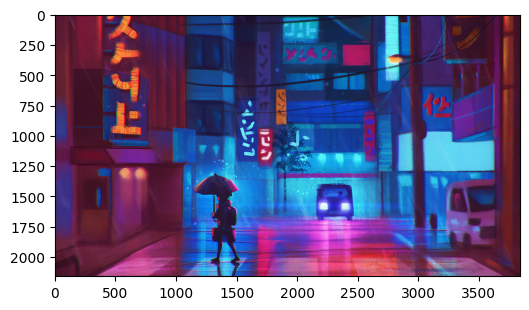

In [94]:
images = images_from_path(r"C:\Users\curvh\OneDrive\Изображения\Новая папка")
# for i in images:
%matplotlib inline
img = plt.imread('wallpaperflare.com_wallpaper (2).jpg')
print(img)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.imshow(img)
plt.show ()



In [58]:

def draw_results(
        results: list[ultralytics.engine.results.Results],
        orig_size: bool = False,
        axis: bool = True,
        image_size: tuple[int] = (640, 640)
        ):
    
    n_images = len(results)
    n_columns = 4
    n_rows = (n_images - 1) // n_columns + 1
    figsize = 15, (n_rows + 1) // 2 * 7.5
    figure = plt.figure(figsize=figsize)
    
    for i in range(1, n_images + 1):
        result = results[i - 1]
        image = cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)
        if orig_size:
            image_size = result.orig_shape[1], result.orig_shape[0]
        image = cv2.resize(image, image_size)
        coef_x, coef_y = image_size[0] / result.orig_shape[1], image_size[1] / result.orig_shape[0]
        for bounding_box, cls in zip(result.boxes.xyxy, result.boxes.cls):
            x0, y0, x1, y1 = bounding_box
            x0, y0, x1, y1 = x0 * coef_x, y0 * coef_y, x1 * coef_x, y1 * coef_y
            
            start_point = (int(x0), int(y0))
            end_point = (int(x1), int(y1))
            box_color = tuple(int(i * 255) for i in random.choice(list(mcolors.BASE_COLORS.values())))
            cv2.rectangle(image, start_point, end_point, color=box_color, thickness=3)
            
            cv2.putText(
                image,
                result.names[int(cls)],
                (int(x0), int(y0) - 5),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1.2,
                color=(255, 165, 0),
                thickness=2,
            )
        figure.add_subplot(n_rows, n_columns, i)
        if not axis:
            plt.axis('off')
        plt.imshow(image)


0: 640x640 1 person, 1 umbrella, 25.9ms
1: 640x640 3 bicycles, 1 truck, 1 stop sign, 25.9ms
2: 640x640 1 person, 1 stop sign, 25.9ms
3: 640x640 1 person, 25.9ms
4: 640x640 3 cars, 25.9ms
5: 640x640 31 persons, 2 handbags, 25.9ms
6: 640x640 (no detections), 25.9ms
7: 640x640 (no detections), 25.9ms
8: 640x640 3 airplanes, 25.9ms
Speed: 4.6ms preprocess, 25.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


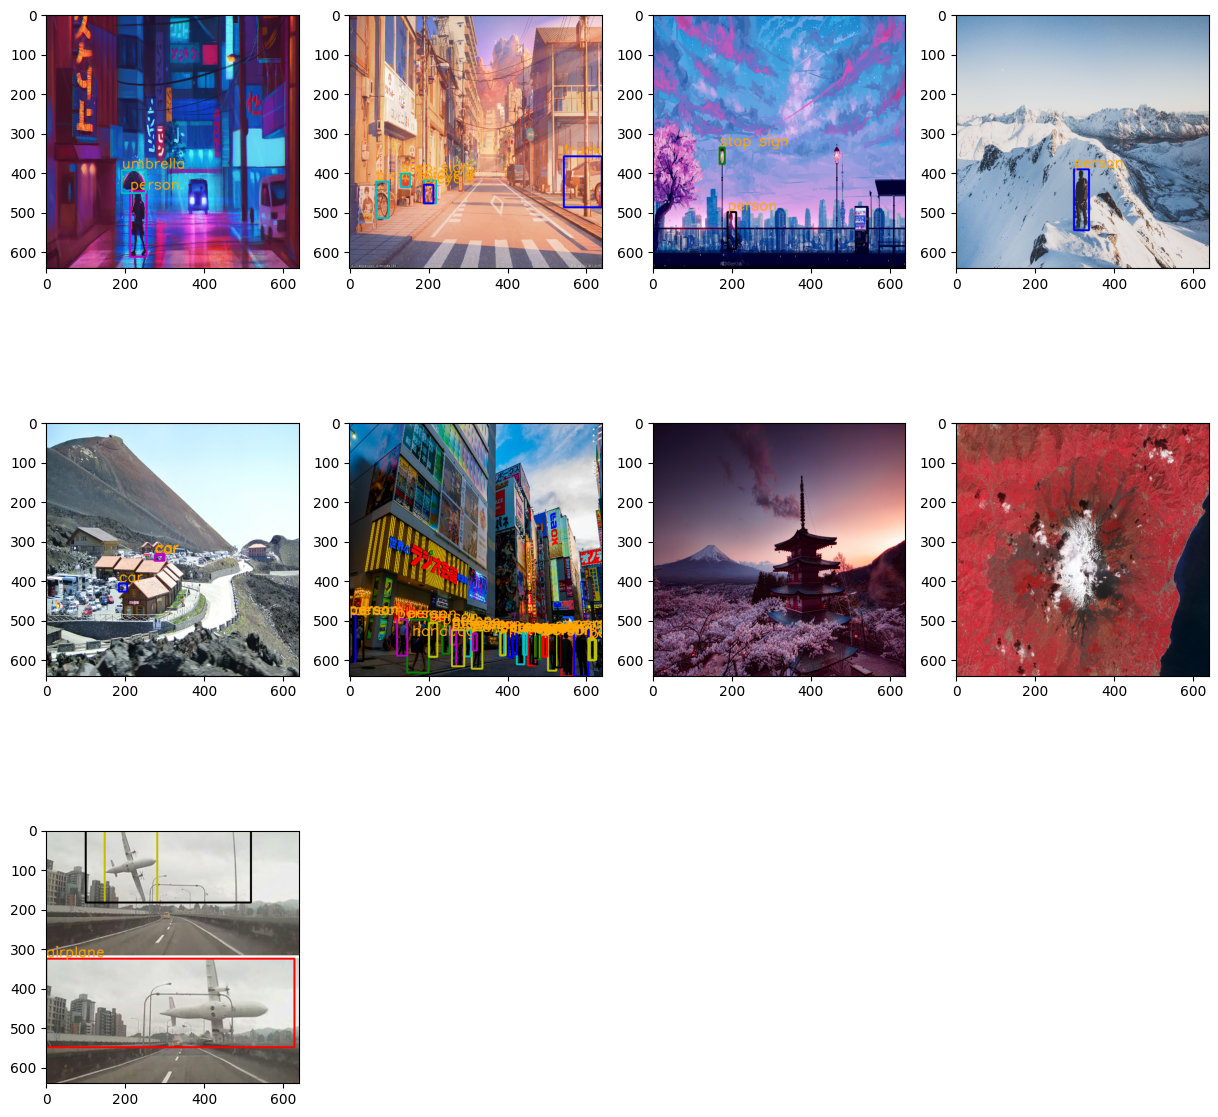

In [95]:
%matplotlib inline
images_to_predict = random.sample(images, 9)
result = model(images_to_predict)
draw_results(result)

In [49]:
%pip install matplotlib.colors

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
